In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [2]:
df_czh = pd.read_csv("Huaneng_SO2/Huaneng_cangzhou.csv")
df_dzu = pd.read_csv("Huaneng_SO2/Huaneng_Dezhou.csv")
df_fzu = pd.read_csv("Huaneng_SO2/Huaneng_Fuzhou.csv")
df_hmn = pd.read_csv("Huaneng_SO2/Huaneng_haimen.csv")
df_jlg = pd.read_csv("Huaneng_SO2/Huaneng_jinling.csv")
df_lwu = pd.read_csv("Huaneng_SO2/Huaneng_laiwu.csv")
df_lhg = pd.read_csv("Huaneng_SO2/Huaneng_luohuang.csv")
df_pgg = pd.read_csv("Huaneng_SO2/Huaneng_pingliang.csv")
df_qnb = pd.read_csv("Huaneng_SO2/Huaneng_qinbei.csv")
df_sgn = pd.read_csv("Huaneng_SO2/Huaneng_shangan.csv")
df_sgd = pd.read_csv("Huaneng_SO2/Huaneng_shangdu.csv")
df_ygu = pd.read_csv("Huaneng_SO2/Huaneng_yangluo.csv")
df_ymn = pd.read_csv("Huaneng_SO2/Huaneng_yimin.csv")
df_yyg = pd.read_csv("Huaneng_SO2/Huaneng_yueyang.csv")
df_yhn = pd.read_csv("Huaneng_SO2/Huaneng_yuhuan.csv")
df_sgk = pd.read_csv("Huaneng_SO2/Shidongkou.csv")

In [3]:
plant_list = [df_czh, df_dzu, df_fzu, df_hmn, df_jlg, df_lwu, df_lhg, df_pgg, df_qnb, df_sgn, df_sgd, df_ygu, df_ymn, df_yyg, df_yhn, df_sgk]
plant_names = ['cangzhou','dezhou','fuzhou','haimen','jinling','laiwu','luohuang','pingliang','qinbei','shangan','shangdu','yangluo','yimin','yueyang','yuhuan','shidongkou']

for plant in plant_list:
    plant.columns = ['date','SO2']

In [4]:
def month_avg(a):
    date_col ="date"
    a[date_col] = pd.to_datetime(a[date_col])
    a['YearMonth'] = a[date_col].dt.to_period('M')
    monthly_avg = a.groupby('YearMonth').mean(numeric_only =True).reset_index()
    monthly_avg['YearMonth'] = monthly_avg['YearMonth'].astype(str)
    return monthly_avg

In [5]:
def change_numeric (a):
    for col in a.columns:
        if col !=  "date":
            a[col] = pd.to_numeric(a[col], errors ='coerce')


for i in range(len(plant_list)):
    plant_list[i].drop(list(range(0,7)), inplace =True)

In [6]:
for plant in plant_list:
    change_numeric(plant)

In [7]:
cleaned_list = []
for a in plant_list: 
    a['date'] = pd.to_datetime(a['date'])
    a = a.sort_values('date')
    a = a.dropna(subset=['SO2'])
    a = a[a['SO2'] > 0]
    a = a.reset_index(drop=True)
    cleaned_list.append(a)

plant_list = cleaned_list

In [8]:
month_avglist = []

for df in cleaned_list:
    monthly_data = month_avg(df)
    month_avglist.append(monthly_data)

print(month_avglist[0].head())

  YearMonth       SO2
0   2014-01  0.306000
1   2014-02  0.040000
2   2014-03  0.464167
3   2014-04  0.300000
4   2014-05  0.810000


In [9]:
dfs_for_final_merge = []

for i, monthly_df in enumerate(month_avglist):
    plant_identifier = plant_names[i]
    df_copy = monthly_df.copy()

    new_column_name = f"{plant_identifier}_SO2"
    df_copy.rename(columns={'SO2': new_column_name}, inplace=True)

    dfs_for_final_merge.append(df_copy)

final_merged_df = None 

if dfs_for_final_merge:
    final_merged_df = dfs_for_final_merge[0]

    for i in range(1, len(dfs_for_final_merge)):
        df_to_merge = dfs_for_final_merge[i]
        final_merged_df = pd.merge(final_merged_df, df_to_merge, on='YearMonth', how='outer')

    print(final_merged_df.head())
    print("\n--- columns list ---")
    print(final_merged_df.columns.tolist())

else:
    print("There is no data frame")

  YearMonth  cangzhou_SO2  dezhou_SO2  fuzhou_SO2  haimen_SO2   jinling_SO2  \
0   2014-01      0.306000    1.157143    1.224444    0.500000  2.501191e+16   
1   2014-02      0.040000    1.542000    0.566667    0.300000  2.816548e+16   
2   2014-03      0.464167    0.938182    1.773333    0.327500  2.470888e+16   
3   2014-04      0.300000    0.606667    0.802500    0.393333  2.503317e+16   
4   2014-05      0.810000    1.177143    0.640000    0.213333  2.224289e+16   

   laiwu_SO2  luohuang_SO2  pingliang_SO2  qinbei_SO2  shangan_SO2  \
0   0.562654      0.930429       1.366667    0.614859     1.664000   
1   0.247378      0.916923            NaN    0.303824     0.815000   
2   0.377236      1.128439       0.650000    0.341393     1.061667   
3   0.280789      1.180462            NaN    0.511279     0.917500   
4   0.267045      0.592943       0.403333    0.603801     0.551250   

   shangdu_SO2  yangluo_SO2  yimin_SO2  yueyang_SO2  yuhuan_SO2  \
0     1.546000     0.820000   1.15666

In [10]:
month_avg_dfs_for_merge = []

for i, df_cleaned in enumerate(cleaned_list):
    plant_identifier = plant_names[i]

    monthly_data_df = month_avg(df_cleaned)

    new_column_name = f"{plant_identifier}_SO2_monthly_avg"
    monthly_data_df.rename(columns={'SO2_monthly_avg': new_column_name}, inplace=True)
    month_avg_dfs_for_merge.append(monthly_data_df)


In [11]:
SO2_columns = [col for col in final_merged_df.columns if col.endswith('_SO2')]
final_merged_df['Total_SO2_Monthly'] = final_merged_df[SO2_columns].sum(axis=1)

print("Total_SO2_Monthly 컬럼 추가 후 final_merged_df의 컬럼:")
print(final_merged_df.columns) 
print(final_merged_df.head())

Total_SO2_Monthly 컬럼 추가 후 final_merged_df의 컬럼:
Index(['YearMonth', 'cangzhou_SO2', 'dezhou_SO2', 'fuzhou_SO2', 'haimen_SO2',
       'jinling_SO2', 'laiwu_SO2', 'luohuang_SO2', 'pingliang_SO2',
       'qinbei_SO2', 'shangan_SO2', 'shangdu_SO2', 'yangluo_SO2', 'yimin_SO2',
       'yueyang_SO2', 'yuhuan_SO2', 'shidongkou_SO2', 'Total_SO2_Monthly'],
      dtype='object')
  YearMonth  cangzhou_SO2  dezhou_SO2  fuzhou_SO2  haimen_SO2   jinling_SO2  \
0   2014-01      0.306000    1.157143    1.224444    0.500000  2.501191e+16   
1   2014-02      0.040000    1.542000    0.566667    0.300000  2.816548e+16   
2   2014-03      0.464167    0.938182    1.773333    0.327500  2.470888e+16   
3   2014-04      0.300000    0.606667    0.802500    0.393333  2.503317e+16   
4   2014-05      0.810000    1.177143    0.640000    0.213333  2.224289e+16   

   laiwu_SO2  luohuang_SO2  pingliang_SO2  qinbei_SO2  shangan_SO2  \
0   0.562654      0.930429       1.366667    0.614859     1.664000   
1   0.247378   

In [12]:
Only_SO2_data = final_merged_df.drop(columns = ['YearMonth'])
total_SO2 = Only_SO2_data.sum(axis =1)

In [13]:
total_SO2

0      5.002382e+16
1      5.633095e+16
2      4.941776e+16
3      5.006635e+16
4      4.448577e+16
           ...     
134    4.060697e+16
135    3.344954e+16
136    2.319461e+16
137    1.633736e+16
138    3.898290e-01
Length: 139, dtype: float64

In [14]:
merged_data = pd.DataFrame()
merged_data ['SO2']= total_SO2
merged_data ['YearMonth'] = final_merged_df ['YearMonth']

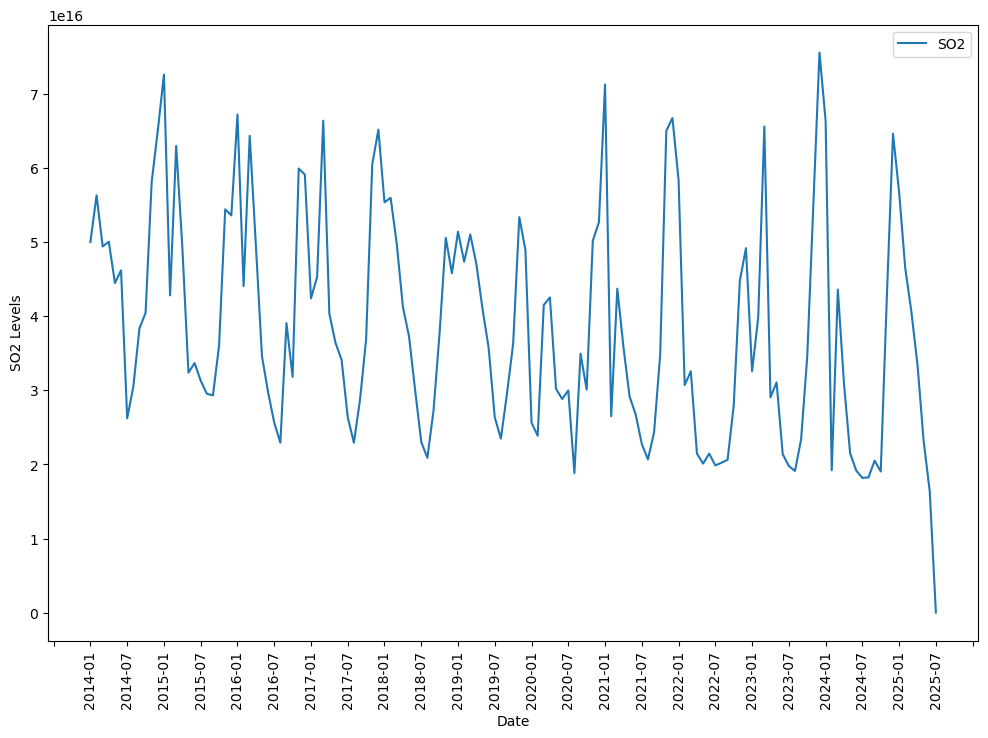

In [17]:
plt.figure(figsize=(12,8))

plt.plot(merged_data['YearMonth'],merged_data['SO2'],label = 'SO2')
plt.xlabel('Date')
plt.ylabel('SO2 Levels')
plt.xticks(rotation =90)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(30))
plt.legend()
plt.show()

In [18]:
df_port = pd.read_csv("port_of_shanghai_NO2_daily.csv")
df_port.columns = ['date','Port_NO2']

In [19]:
df_port=df_port.drop(list(range(0,7)))

In [20]:
change_numeric(df_port)

In [21]:
df_port['date'] = pd.to_datetime(df_port['date'])
df_port = df_port.sort_values('date')
df_port = df_port.dropna(subset=['Port_NO2'])
df_port = df_port[df_port['Port_NO2']>0]
df_port = df_port.reset_index(drop =True)

In [22]:
df_port_month = month_avg (df_port)

In [23]:
df_port_month

,YearMonth,Port_NO2
0,2014-01,1.205344e+16
1,2014-02,8.354022e+15
2,2014-03,1.170634e+16
3,2014-04,1.103731e+16
4,2014-05,7.870786e+15
...,...,...
120,2024-01,1.590160e+16
121,2024-02,9.131516e+15
122,2024-03,1.263264e+16
123,2024-04,7.636185e+15


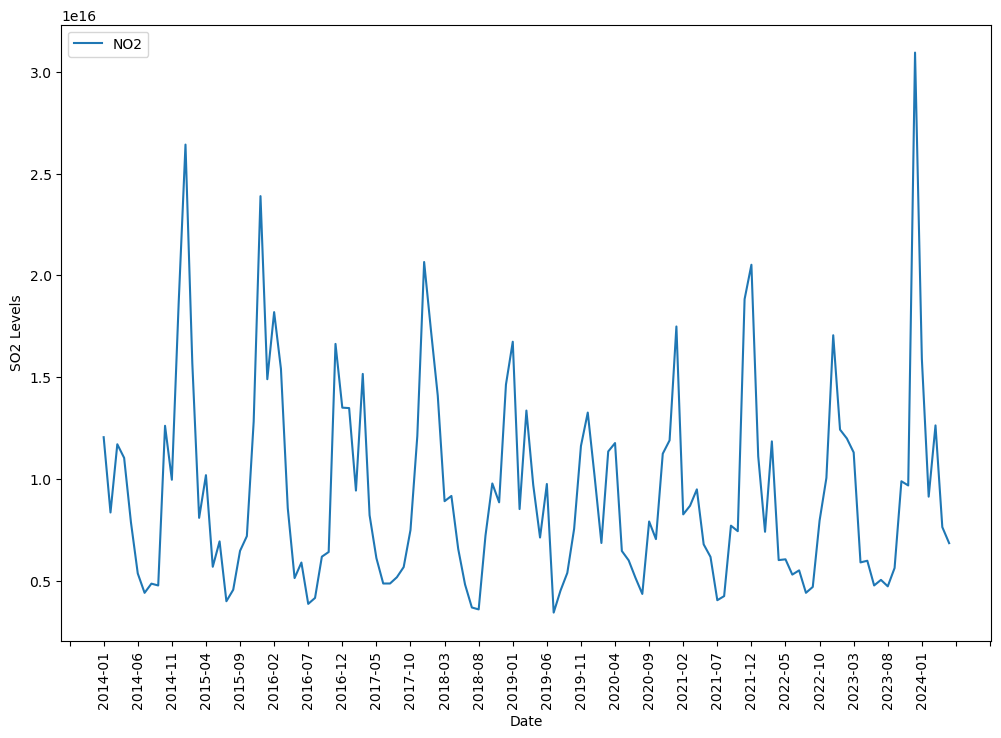

In [24]:
plt.figure(figsize=(12,8))

plt.plot(df_port_month['YearMonth'],df_port_month['Port_NO2'],label = 'NO2')
plt.xlabel('Date')
plt.ylabel('SO2 Levels')
plt.xticks(rotation =90)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(30))
plt.legend()
plt.show()

In [25]:
Power_Port =pd.merge(merged_data, df_port_month)

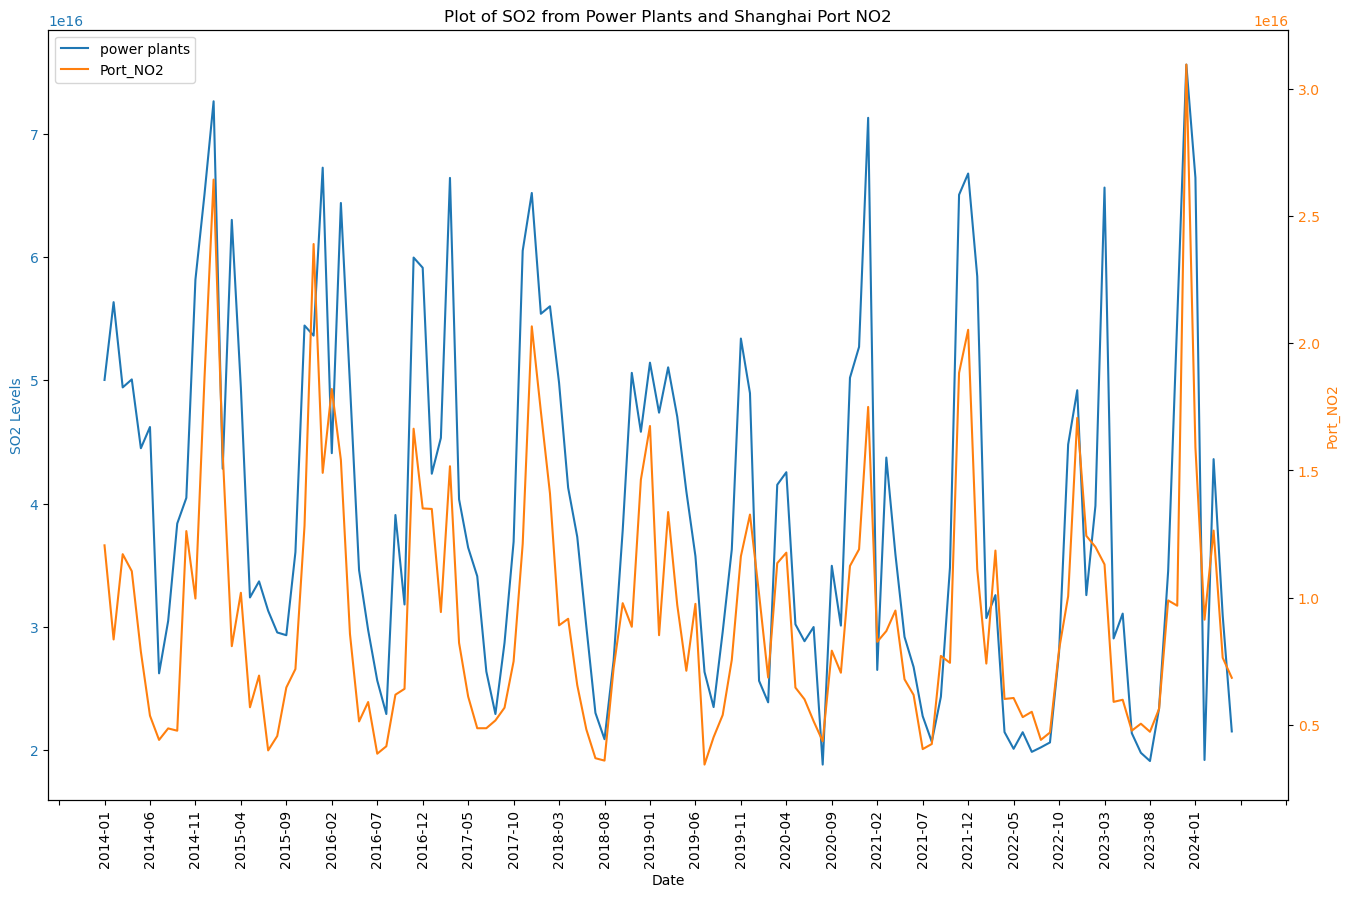

In [28]:
fig, ax1 = plt.subplots(figsize=(16, 10))
ax1.plot(Power_Port['YearMonth'], Power_Port['SO2'], color='tab:blue', label='power plants')
ax1.set_xlabel('Date')
ax1.set_ylabel('SO2 Levels', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.xaxis.set_major_locator(plt.MaxNLocator(30))
ax1.tick_params(axis='x', rotation=90)

ax2 = ax1.twinx()
ax2.plot(Power_Port['YearMonth'], Power_Port['Port_NO2'], color='tab:orange', label='Port_NO2')
ax2.set_ylabel('Port_NO2', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title('Plot of SO2 from Power Plants and Shanghai Port NO2')
plt.show()